In [12]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os

### Extracting kaggle dataset

In [13]:
os.system('kaggle datasets download -d mikoajbigaj/bgg-board-game-dataset')

0

In [36]:
with ZipFile('bgg-board-game-dataset.zip', 'r') as zip_file:
    zip_file.extractall('data/')

os.remove('bgg-board-game-dataset.zip')

### Importing and checking dataset

In [15]:
board_game_set = pd.read_csv('data/final_board_game_dataset.csv')
board_game_set.head(5)

,@objectid,name,yearpublished,boardgamepublisher,boardgamecategory,boardgamemechanic,minplayers,maxplayers,age,minplaytime,maxplaytime,boardgameexpansion,description,image
0,1,Die Macher,1986.0,Hans im Glück,"['Economic', 'Negotiation', 'Political']","['Alliances', 'Area Majority / Influence', 'Au...",3.0,5.0,14.0,240.0,240.0,NaN,Die Macher is a game about seven sequential po...,https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...
1,2,Dragonmaster,1981.0,E. S. Lowe Company Inc.,"['Card Game', 'Fantasy']",['Trick-taking'],3.0,4.0,12.0,30.0,30.0,NaN,Dragonmaster is a trick-taking card game based...,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...
2,3,Samouraï,1998.0,Fantasy Flight Games,"['Abstract Strategy', 'Medieval']","['Area Majority / Influence', 'Hand Management...",2.0,4.0,10.0,30.0,60.0,NaN,Samurai is set in medieval Japan. Players comp...,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...
3,4,Tal der Könige,1992.0,KOSMOS,['Ancient'],"['Action Points', 'Area Majority / Influence',...",2.0,4.0,12.0,60.0,60.0,NaN,When you see the triangular box and the luxuri...,https://cf.geekdo-images.com/nYiYhUlatT2DpyXaJ...
4,5,Acquire,1963.0,3M,"['Economic', 'Territory Building']","['Hand Management', 'Investment', 'Market', 'S...",2.0,6.0,12.0,90.0,90.0,['1963 World Map Conversion Kit for the Game o...,"In Acquire, each player strategically invests ...",https://cf.geekdo-images.com/FfguJeknahk88vKT7...


### Dropping not useful data columns for the purpose of training

In [16]:
board_game_set = board_game_set.drop(['@objectid', 'name', 'boardgamepublisher', 'boardgamemechanic', 'boardgameexpansion', 'description', 'image', 'yearpublished'], axis=1)
board_game_set

,boardgamecategory,minplayers,maxplayers,age,minplaytime,maxplaytime
0,"['Economic', 'Negotiation', 'Political']",3.0,5.0,14.0,240.0,240.0
1,"['Card Game', 'Fantasy']",3.0,4.0,12.0,30.0,30.0
2,"['Abstract Strategy', 'Medieval']",2.0,4.0,10.0,30.0,60.0
3,['Ancient'],2.0,4.0,12.0,60.0,60.0
4,"['Economic', 'Territory Building']",2.0,6.0,12.0,90.0,90.0
...,...,...,...,...,...,...
382035,['Pirates'],2.0,4.0,7.0,20.0,30.0
382036,NaN,NaN,NaN,NaN,NaN,NaN
382037,NaN,NaN,NaN,NaN,NaN,NaN
382038,NaN,NaN,NaN,NaN,NaN,NaN


### Splitting categories and One Hot Encoding them for training

In [17]:
all_categories = board_game_set['boardgamecategory']
all_categories_list = [categories.strip("['']").split(', ') if isinstance(categories, str) else [] for categories in all_categories]
all_categories_list[0]

["Economic'", "'Negotiation'", "'Political"]

### Replacing string values with an array of categories instead

In [18]:
singular_game_categories = []

for index, categories in enumerate(all_categories_list):
    clean_categories = []
    for category in categories:
        category = category.strip('"')
        category = category.strip("'")
        category = category.replace("'", '')
        category = category.replace('"', '')
        clean_categories.append(category)
        if category not in singular_game_categories:
            singular_game_categories.append(category)
    all_categories_list[index] = clean_categories

singular_game_categories

['Economic',
 'Negotiation',
 'Political',
 'Card Game',
 'Fantasy',
 'Abstract Strategy',
 'Medieval',
 'Ancient',
 'Territory Building',
 'Civilization',
 'Nautical',
 'Childrens Game',
 'City Building',
 'Exploration',
 'Travel',
 'Farming',
 'Mythology',
 'Bluffing',
 'Science Fiction',
 'Collectible Components',
 'Dice',
 'Fighting',
 'Print & Play',
 'Maze',
 'Miniatures',
 'Racing',
 'American West',
 'Wargame',
 'Adventure',
 'Space Exploration',
 'Renaissance',
 'Modern Warfare',
 'Humor',
 'Electronic',
 'Horror',
 'Novel-based',
 'Deduction',
 'Word Game',
 'Aviation / Flight',
 'Movies / TV / Radio theme',
 'Party Game',
 'Memory',
 'Math',
 'Puzzle',
 'Real-time',
 'Trivia',
 'Industry / Manufacturing',
 'World War II',
 'Expansion for Base-game',
 'American Civil War',
 'Age of Reason',
 'American Indian Wars',
 'World War I',
 'Trains',
 'Animals',
 'Pirates',
 'Murder/Mystery',
 'Transportation',
 'Prehistoric',
 'Sports',
 'Action / Dexterity',
 'Game System',
 'Number

### Replacing string categories with array value categories

In [19]:
board_game_set['boardgamecategory'] = all_categories_list

In [20]:
board_game_set['boardgamecategory']

0         [Economic, Negotiation, Political]
1                       [Card Game, Fantasy]
2              [Abstract Strategy, Medieval]
3                                  [Ancient]
4             [Economic, Territory Building]
                         ...                
382035                             [Pirates]
382036                                    []
382037                                    []
382038                                    []
382039                                    []
Name: boardgamecategory, Length: 382040, dtype: object

### Creating seperate columns with 0 values for every category

In [21]:
for singular_game_category in singular_game_categories:
    board_game_set[singular_game_category] = 0

board_game_set

,boardgamecategory,minplayers,maxplayers,age,minplaytime,maxplaytime,Economic,Negotiation,Political,Card Game,...,Book,Music,Environmental,Pike and Shot,Religious,Video Game Theme,Mature / Adult,Vietnam War,Fan Expansion,Korean War
0,"[Economic, Negotiation, Political]",3.0,5.0,14.0,240.0,240.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Card Game, Fantasy]",3.0,4.0,12.0,30.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Abstract Strategy, Medieval]",2.0,4.0,10.0,30.0,60.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[Ancient],2.0,4.0,12.0,60.0,60.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Economic, Territory Building]",2.0,6.0,12.0,90.0,90.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382035,[Pirates],2.0,4.0,7.0,20.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382036,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382037,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382038,[],NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Replacing values with 1 for categories in seperate columns for every board game

In [22]:
for index, categories in enumerate(board_game_set['boardgamecategory']):
    for category in categories:
        board_game_set.loc[index, category] = 1

board_game_set = board_game_set.drop(['boardgamecategory'], axis=1)

### Removing null values that might potentially hinder training

In [23]:
pd.set_option('display.max_columns', None)
board_game_set = board_game_set.dropna()
board_game_set

,minplayers,maxplayers,age,minplaytime,maxplaytime,Economic,Negotiation,Political,Card Game,Fantasy,Abstract Strategy,Medieval,Ancient,Territory Building,Civilization,Nautical,Childrens Game,City Building,Exploration,Travel,Farming,Mythology,Bluffing,Science Fiction,Collectible Components,Dice,Fighting,Print & Play,Maze,Miniatures,Racing,American West,Wargame,Adventure,Space Exploration,Renaissance,Modern Warfare,Humor,Electronic,Horror,Novel-based,Deduction,Word Game,Aviation / Flight,Movies / TV / Radio theme,Party Game,Memory,Math,Puzzle,Real-time,Trivia,Industry / Manufacturing,World War II,Expansion for Base-game,American Civil War,Age of Reason,American Indian Wars,World War I,Trains,Animals,Pirates,Murder/Mystery,Transportation,Prehistoric,Sports,Action / Dexterity,Game System,Number,Spies/Secret Agents,Medical,Mafia,Zombies,Comic Book / Strip,Arabian,Napoleonic,Civil War,Educational,Post-Napoleonic,American Revolutionary War,Book,Music,Environmental,Pike and Shot,Religious,Video Game Theme,Mature / Adult,Vietnam War,Fan Expansion,Korean War
0,3.0,5.0,14.0,240.0,240.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,4.0,12.0,30.0,30.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,10.0,30.0,60.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,4.0,12.0,60.0,60.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,6.0,12.0,90.0,90.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382028,2.0,2.0,14.0,20.0,40.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382029,2.0,4.0,5.0,1.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382033,1.0,100.0,8.0,120.0,240.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382034,2.0,2.0,10.0,10.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling training data to match 0 - 1 value range

In [24]:
def scale_data(dataset: pd.DataFrame, columns: list):
    for column in columns:
        max_value = max(dataset[column])
        dataset[column] = dataset[column] / max_value

### Normalizing data

In [25]:
columns_to_scale = ['minplayers', 'maxplayers', 'age', 'minplaytime', 'maxplaytime']

scale_factors = dict.fromkeys(columns_to_scale)

for column in columns_to_scale:
    scale_factors[column] = max(board_game_set[column])

print(scale_factors)

scale_data(board_game_set, columns_to_scale)

{'minplayers': 2024.0, 'maxplayers': 11299.0, 'age': 180.0, 'minplaytime': 157680.0, 'maxplaytime': 63072000.0}


In [26]:
board_game_set.head(5)

,minplayers,maxplayers,age,minplaytime,maxplaytime,Economic,Negotiation,Political,Card Game,Fantasy,Abstract Strategy,Medieval,Ancient,Territory Building,Civilization,Nautical,Childrens Game,City Building,Exploration,Travel,Farming,Mythology,Bluffing,Science Fiction,Collectible Components,Dice,Fighting,Print & Play,Maze,Miniatures,Racing,American West,Wargame,Adventure,Space Exploration,Renaissance,Modern Warfare,Humor,Electronic,Horror,Novel-based,Deduction,Word Game,Aviation / Flight,Movies / TV / Radio theme,Party Game,Memory,Math,Puzzle,Real-time,Trivia,Industry / Manufacturing,World War II,Expansion for Base-game,American Civil War,Age of Reason,American Indian Wars,World War I,Trains,Animals,Pirates,Murder/Mystery,Transportation,Prehistoric,Sports,Action / Dexterity,Game System,Number,Spies/Secret Agents,Medical,Mafia,Zombies,Comic Book / Strip,Arabian,Napoleonic,Civil War,Educational,Post-Napoleonic,American Revolutionary War,Book,Music,Environmental,Pike and Shot,Religious,Video Game Theme,Mature / Adult,Vietnam War,Fan Expansion,Korean War
0,0.001482,0.000443,0.077778,0.001522,3.805175e-06,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.001482,0.000354,0.066667,0.000190,4.756469e-07,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.000988,0.000354,0.055556,0.000190,9.512938e-07,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.000988,0.000354,0.066667,0.000381,9.512938e-07,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000988,0.000531,0.066667,0.000571,1.426941e-06,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Training model with 5 preset categories

In [28]:
model = KMeans(n_clusters=5, verbose=1, random_state=1)
board_game_set['clusters'] = model.fit_predict(board_game_set)

Initialization complete
Iteration 0, inertia 474095.5506088263.
Iteration 1, inertia 318135.80730108917.
Iteration 2, inertia 309127.7262692319.
Iteration 3, inertia 308160.61348852253.
Iteration 4, inertia 306571.58480549767.
Iteration 5, inertia 305188.98891874816.
Iteration 6, inertia 304460.4709228511.
Iteration 7, inertia 303991.83932084613.
Iteration 8, inertia 303068.84331601707.
Iteration 9, inertia 303009.72530138656.
Iteration 10, inertia 302954.58211559686.
Iteration 11, inertia 302946.4686348506.
Iteration 12, inertia 302945.4893409826.
Iteration 13, inertia 302945.2539804785.
Converged at iteration 13: center shift 1.0790899837178299e-06 within tolerance 2.742895987999975e-06.


### Data scatter analysis for visual cluster representation

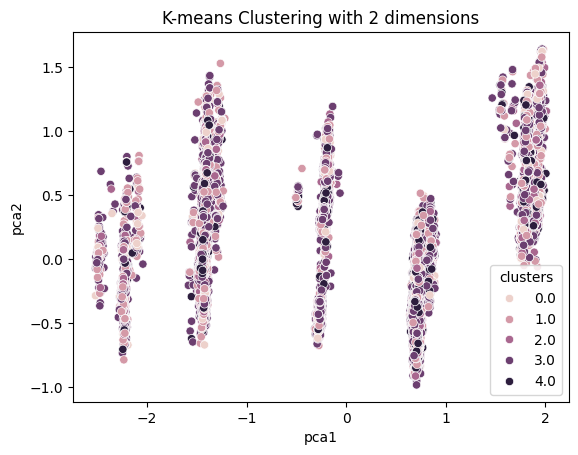

In [29]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(board_game_set)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=board_game_set['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Creating a copy of the training dataset to display training results

In [30]:
board_game_set_copy = board_game_set.drop(['minplayers', 'maxplayers', 'age', 'minplaytime', 'maxplaytime'], axis=1)

In [31]:
def categories_for_cluster(dataset: pd.DataFrame, cluster: int):
    dataset_for_cluster = dataset[dataset['clusters'] == cluster]
    dataset_for_cluster = dataset_for_cluster.drop(['clusters'], axis=1)

    categories = dict.fromkeys(dataset_for_cluster.columns)

    for column in dataset_for_cluster.columns:
        categories[column] = len([category for category in dataset_for_cluster[column] if category == 1])

    return categories

### Assigning cluster categories with counts to dict

In [32]:
clusters = [0, 1, 2, 3, 4]

categories_in_clusters = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
}

for cluster in clusters:
    categories_in_clusters[cluster] = categories_for_cluster(board_game_set_copy, cluster)

print(categories_in_clusters[0])
print(categories_in_clusters[1])
print(categories_in_clusters[2])
print(categories_in_clusters[3])
print(categories_in_clusters[4])

{'Economic': 101, 'Negotiation': 54, 'Political': 73, 'Card Game': 747, 'Fantasy': 326, 'Abstract Strategy': 10508, 'Medieval': 207, 'Ancient': 237, 'Territory Building': 288, 'Civilization': 43, 'Nautical': 101, 'Childrens Game': 380, 'City Building': 88, 'Exploration': 70, 'Travel': 37, 'Farming': 54, 'Mythology': 122, 'Bluffing': 215, 'Science Fiction': 219, 'Collectible Components': 38, 'Dice': 633, 'Fighting': 157, 'Print & Play': 752, 'Maze': 126, 'Miniatures': 45, 'Racing': 200, 'American West': 24, 'Wargame': 272, 'Adventure': 78, 'Space Exploration': 62, 'Renaissance': 27, 'Modern Warfare': 38, 'Humor': 100, 'Electronic': 42, 'Horror': 39, 'Novel-based': 40, 'Deduction': 246, 'Word Game': 41, 'Aviation / Flight': 20, 'Movies / TV / Radio theme': 78, 'Party Game': 139, 'Memory': 185, 'Math': 218, 'Puzzle': 660, 'Real-time': 69, 'Trivia': 17, 'Industry / Manufacturing': 22, 'World War II': 38, 'Expansion for Base-game': 361, 'American Civil War': 10, 'Age of Reason': 1, 'America

### Creating functions to create sorted data for display purposes as well as getting the highest category count in clusters

In [33]:
def return_data_for_display(data_dict: dict, threshhold: int = 500):
    display_dict = dict()

    for key, value in data_dict.items():
        if value >= threshhold:
            display_dict[key] = value

    sorted_display = dict(sorted(display_dict.items(), key=lambda item: item[1], reverse=True))

    return sorted_display

def get_top_category_key(category_dict: dict):
    top_category = ''
    highest_count = 0

    for key, value in category_dict.items():
        if value > highest_count:
            top_category = key
            highest_count = value

    return top_category

### Showing the top % of category in every cluster

In [34]:
for cluster in clusters:
    cluster_data_count = sum(categories_in_clusters[cluster].values())
    first_key = get_top_category_key(categories_in_clusters[cluster])
    data_for_display = return_data_for_display(categories_in_clusters[cluster], int(0.01 * cluster_data_count))

    print(f'Cluster - {cluster}, Count - {cluster_data_count}, {round(100 * data_for_display[first_key] / cluster_data_count, 2)}% = {first_key}\n'
          f'{data_for_display}\n')

Cluster - 0, Count - 20454, 51.37% = Abstract Strategy
{'Abstract Strategy': 10508, 'Print & Play': 752, 'Card Game': 747, 'Puzzle': 660, 'Dice': 633, 'Animals': 439, 'Childrens Game': 380, 'Expansion for Base-game': 361, 'Fantasy': 326, 'Educational': 296, 'Territory Building': 288, 'Wargame': 272, 'Deduction': 246, 'Ancient': 237, 'Science Fiction': 219, 'Math': 218, 'Bluffing': 215, 'Medieval': 207}

Cluster - 1, Count - 118718, 32.69% = Card Game
{'Card Game': 38810, 'Expansion for Base-game': 7341, 'Fantasy': 6214, 'Party Game': 4784, 'Fighting': 4090, 'Humor': 3863, 'Childrens Game': 3054, 'Animals': 2546, 'Print & Play': 2544, 'Bluffing': 2467, 'Educational': 2376, 'Science Fiction': 2363, 'Dice': 2224, 'Movies / TV / Radio theme': 1790, 'Deduction': 1777, 'Collectible Components': 1683, 'Trivia': 1453, 'Medieval': 1304, 'Horror': 1284, 'Adventure': 1270}

Cluster - 2, Count - 44350, 25.89% = Expansion for Base-game
{'Expansion for Base-game': 11480, 'Trivia': 5625, 'Party Game'

### Assigning the cluster based on example

In [35]:
to_predict = pd.DataFrame(columns=board_game_set.columns)

for column in board_game_set.columns:
    if column == "Children's Game":
        to_predict.loc[0, column] = 1
        continue    
    to_predict.loc[0, column] = 0

to_predict = to_predict.drop(['clusters'], axis=1)

model.predict(to_predict)

array([3])